<h1>Задание 1 - часть 1 - Квадратик</h1>

In [1]:
import math

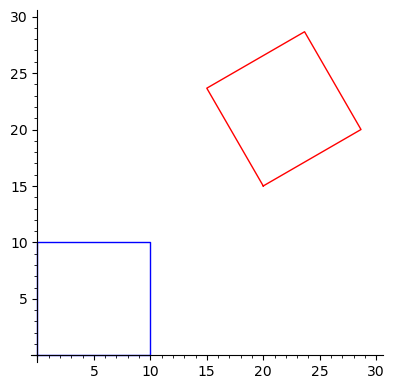

In [2]:
a = 10
rectangle_src = matrix([[0,0], [0,a], [a,a], [a,0], [0,0]])
alpha = math.radians(30)
matrix_rotation = matrix([
    [cos(alpha), sin(alpha)],
    [-sin(alpha), cos(alpha)]
])

rectangle_rotated = rectangle_src * matrix_rotation

x_move = 20
y_move = 15
i = 0
for elem in rectangle_rotated:
    elem[0] += x_move
    elem[1] += y_move
    rectangle_rotated[i] = elem
    i+=1

show(line(rectangle_src) + line(rectangle_rotated, color='red'), xmin = 0, xmax = 30, ymin = 0, ymax = 30, aspect_ratio=1)

<h1>Задание 1 - часть 2 - Исследование функции</h1>
Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>

In [3]:
print("Номер в списке: 14.")
print("Номер задания: 6")
var("x T")
y = ln(x - 1) / (x - 1)^2
show("Функция по заданию: ", y)

Номер в списке: 14.
Номер задания: 6


'Функция по заданию: ' log(x - 1)/(x - 1)^2

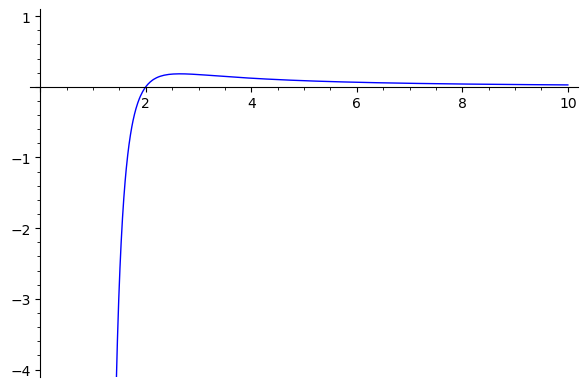

In [4]:
function = plot(y, (1, 10), ymin = -4, ymax = 1, detect_poles='show', exclude=[1])
show(function, xmin=0, xmax=10)

<h3>1. Область определения функции.</h3>

$D: x > 1$

Так как аргумент логарифма $x-1 > 0 \Rightarrow x > 1$. Также знаменатель функции $(x-1)^2 \neq 0 \Rightarrow x \neq 1$. Поэтому в итоге получается, что функция определена на $x \in (1, +\infty)$.

<h3>2. Является ли функция четной или нечетной, является ли периодической.</h3>

$\textbf{Чётные и нечётные функции}$ - это функции, которые обладают симметрией относительно знака аргумента.

$\textbf{Чётная функция}$ - функция, не изменяющая своего значения при изменении знака независимой переменной: $f(x)=f(-x)$

$\textbf{Нечётная функция}$ - функция, меняющая значение на противоположное при изменении знака независимой переменной: $f(x)=-f(-x)$

$\textbf{Функция общего вида}$ - функция, которая не является ни чётной, ни нечётной.

In [5]:
if ((y(x) - y(-x)).expand().simplify() == 0):
    print("Функция чётная.")
elif ((y(x) + y(-x)).expand().simplify() == 0):
    print("Функция нечётная.")
else:
    print("Функция общего вида")

Функция общего вида


Видно, что функция является функцией общего вида.

Функция $y = f(x)$ называется $\textbf{периодической}$, если существует такое число $T \neq 0$ - период, что для любого значения x, взятого из области определения функции, значения $(x+T)$ и $(x-T)$ также принадлежат области определения и выполняется равенство $f(x) = f(x+T) = f(x-T)$.

График периодической функции состоит из неограниченно повторяющихся одинаковых фрагментов.

In [6]:
var("T")
eq = y(x) - y(x + T)

In [7]:
solve(eq, T)

[T == -(x*log(x - 1) + sqrt(log(T + x - 1)*log(x - 1))*(x - 1) - log(x - 1))/log(x - 1), T == -(x*log(x - 1) - sqrt(log(T + x - 1)*log(x - 1))*(x - 1) - log(x - 1))/log(x - 1)]

Мы получили T, которое зависит от самого себя. 
Поэтому проверяем периодичность функции по графику.

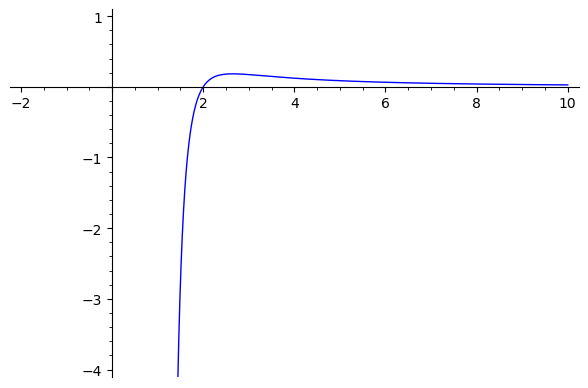

In [8]:
show(function, xmin=-2, xmax=10)

Из графика видно, что функция не является периодической, так как график функции не состоит из неограниченно повтряющихся одинаковых фрагментов. 

<h3>3. Точки пересечения графика с осями координат</h3>

In [9]:
root = solve(y, x)
show("Корни функции: ", root)

'Корни функции: ' [x == 2]

Так как область определения $D: x > 1$, то функция не будет пересекать ось ординат (ось $Oy$). 
Ось абсцисс (ось $Ox$) функция пересекает в точке $x = 2$.

<h3>4. Промежутки знакопостоянства</h3>

Мы знаем, что корень функции $x = 2$. Поэтому мы должны проверить, знак функции слева и справа от корня.

In [10]:
if (y(2 - 0.0001) < 0):
    print("y < 0 при x: (1, 2)")
else:
    print("y > 0 при x: (1, 2)")
    
if (y(2 + 0.0001) < 0):
    print("y < 0 при x: (2, +\u221E)")
else:
    print("y > 0 при x: (2, +\u221E)")

y < 0 при x: (1, 2)
y > 0 при x: (2, +∞)


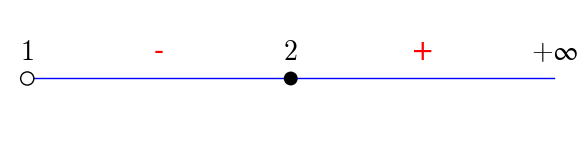

In [11]:
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=0, xmax=4, ymin=-0.5, ymax=0.5)

# добавление красных маркеров - отметки точек\маркеров
intervals_of_constancy  += point((2, 0), color="black", size=100,  zorder=10)

# Здесь добавляем выколотую точку
intervals_of_constancy += circle((0, 0), 0.05, edgecolor="black", 
                                 facecolor='white', 
                                 fill=True)

# Здесь добавляем подписи точек (значения по оси X)
intervals_of_constancy  += text("$1$", (0, 0.2), color="black", fontsize=20)
intervals_of_constancy  += text("$2$", (2, 0.2), color="black", fontsize=20)
intervals_of_constancy  += text("$+\u221E$", (4, 0.2), color="black", fontsize=20)

# Здесь добавляем подписи знаков промежутков знакопостоянства
y_margin = 0.2  # смещение по оси Y элемента подписи, чтобы он не наслаивался на линию 
intervals_of_constancy  += text("-", (1 , y_margin), color="red", fontsize=20)
intervals_of_constancy  += text("+", (3 , y_margin), color="red", fontsize=20)

# Оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

<h3>5. Промежутки возрастания и убывания</h3>

In [12]:
differential_function = diff(y)
show(differential_function)

-2*log(x - 1)/(x - 1)^3 + 1/(x - 1)^3

In [13]:
differential_grapf = plot(differential_function, (1, 10), exclude=[1])

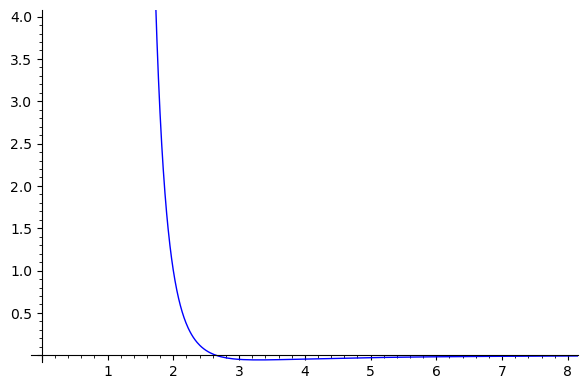

In [14]:
show(differential_grapf, xmin=0, xmax = 8, ymin=0, ymax=4)

In [15]:
# Находим значение x, при котором производная равна нулю
differential_root = solve([diff(y, x) == 0], x, solution_dict=True)[0][x]
show("Корень производной: ", differential_root)

'Корень производной: ' e^(1/2) + 1

В точке $x = e^{\frac{1}{2}} + 1$ производная функции равна нулю.

У производной от заданной функции всего один корень, поэтому мы должны посмотреть всего два промежутка.

In [16]:
# Находим промежутки возрастания и убывания функции,
# рассматривая значения производной от функции слева и справа от корня производной
if (float(differential_function(differential_root-0.0001)) < 0):
    show("Функция ", y, "убывает на промежутке: (1, {differential_root}")
else:
    show("Функция ", y, f"возрастает на промежутке: (1, {differential_root})")
    
if (float(differential_function(differential_root+0.0001)) < 0):
    show("Функция ", y, f"убывает на промежутке: ({differential_root}, +\u221E)")
else:
    show("Функция ", y, f"возрастает на промежутке: ({differential_root}, +\u221E)")

'Функция ' log(x - 1)/(x - 1)^2 'возрастает на промежутке: (1, e^(1/2) + 1)'

'Функция ' log(x - 1)/(x - 1)^2 'убывает на промежутке: (e^(1/2) + 1, +∞)'

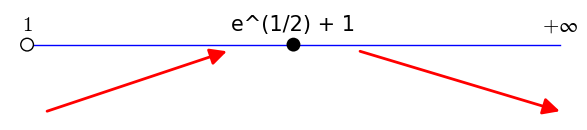

In [17]:
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=0, xmax=8, ymin=-0.5, ymax=0.5)

# Добавление красных маркеров - отметки точек\маркеров
intervals_of_constancy  += point((4, 0), color="black", size=100,  zorder=10)


# Добавление выколотой точки 1
intervals_of_constancy += circle((0, 0), 0.095, edgecolor="black", 
                                 facecolor='white', 
                                 fill=True)

# Здесь добавляем подписи точек (значения по оси X)
intervals_of_constancy  += text("$1$", (0, 0.3), color="black", fontsize=15)
intervals_of_constancy  += text(f"{differential_root}", (4,0.3), color="black", fontsize=15)
intervals_of_constancy  += text("$+\u221E$", (8, 0.3), color="black", fontsize=15)

# Здесь добавляем стрелки возрастания и убывания функции
intervals_of_constancy  += arrow((0.3,-1), (3,-0.1), color = "red")
intervals_of_constancy  += arrow((5,-0.1), (8,-1), color = "red")

# Оси не нужны - скрываем
intervals_of_constancy.show(axes=False, ymin=-1.1, ymax=0.5)

Функция возрастает на промежутке $x \in (1, e^{\frac{1}{2}} + 1)$.

Функция убывает на промежутке $x \in (e^{\frac{1}{2}} + 1, +\infty)$.

<h3>6. Точки экстремума и значения в этих точках.</h3>

Так как при нахождении промежутков возрастания и убывания было выянено, что производная от функции $y = \frac{ln(x - 1)}{(x - 1)^2}$ имеет принимает отрицательные значения при $x \in (1, e^{\frac{1}{2}} + 1)$, и принимает положительные значения при $x \in (e^{\frac{1}{2}} + 1, +\infty)$, то $x = e^{\frac{1}{2}}$ - точка экстремума функции $y = \frac{ln(x - 1)}{(x - 1)^2}$.

In [18]:
# Осталось найти значение функции y в точке экстремума
y_extremum = y(differential_root)
print(f"Экстремум: x = {differential_root}, y = {y_extremum}")

Экстремум: x = e^(1/2) + 1, y = 1/2*e^(-1)


<h3>7. Непрерывность. Наличие точек разрыва и их классификация.</h3>

In [19]:
limit(y, x = 1, dir = '+')

-Infinity

Функция определена и непрерывна на $x \in (1; +\infty)$.
В точке $x = 1$ функция имеет правосторонний предел, равный $-\infty$, значит, $x = 1$ - точка разрыва 2 рода.

<h3>8. Асимптоты</h3>

Прямая $y = kx+b$ называется наклонной асимптотой графика функции $y = f(x)$,
при $x \to +\infty$, если $\lim\limits_{x\to +\infty}[f(x) - (kx+b)] = 0$.

Прямая $y = kx+b$ называется наклонной асимптотой графика функции $y = f(x)$,
при $x \to -\infty$, если $\lim\limits_{x\to -\infty}[f(x) - (kx+b)] = 0$.

In [20]:
k1 = limit(y(x)/x, x=-Infinity)
b1 = limit(y(x)-k1*x, x=-Infinity)

k2 = limit(y(x)/x, x=+Infinity)
b2 = limit(y(x)-k2*x, x=+Infinity)

print(f"k1={k1}, b1={b1}")
print(f"k2={k2}, b2={b2}")

k1=0, b1=0
k2=0, b2=0


При поиске наклонных асимптот $y=kx+b$ получилось, что $k=0$ и $b=0$. Следовательно $y=0$ - горизонтальная асимптота (т.к. $k=0$).

Прямая $x = a$ является вертикальной асимптотой графика функции $y = f(x)$, если выполнено хотя бы одно из условий: $\lim\limits_{x\to a-0}f(x) = \pm\infty$, $\lim\limits_{x\to a+0}f(x) = \pm\infty$.

In [21]:
# Так как функция определена на (1, +Infinity), то смотрим предел 1 справа.
limit(y(x), x=1, dir='+')

-Infinity

Из результата видно, что $x=1$ - вертикальная асимптота.

In [22]:
vertical_asymptote = 1
horizontal_asymptote = 0

Функция имеет горизонтальную асимптоту y = 0. 

Функция имеет вертикальную асимптоту x = 1.

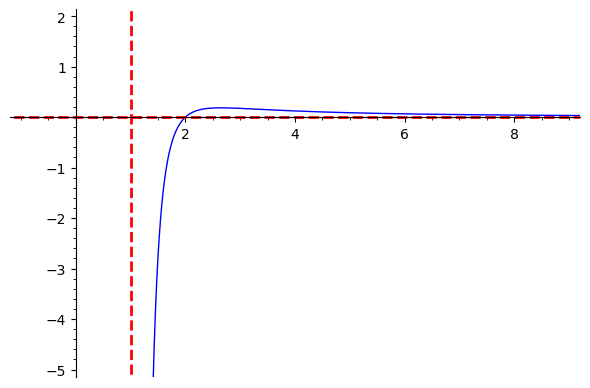

In [23]:
vert_asympt_graph = line([(vertical_asymptote, -10), (vertical_asymptote, 10)], 
                         color="red", 
                         linestyle='--',
                         thickness=2)

hor_asympt_graph = line([(-10, horizontal_asymptote), (10, horizontal_asymptote)], 
                        color="red", 
                        linestyle='--',
                        thickness=2)
show(function + vert_asympt_graph + hor_asympt_graph, xmin = -1, xmax = 9, ymin = -5, ymax = 2)